In [1]:
from google.colab import files
uploaded = files.upload()

Saving positive.csv to positive.csv


In [2]:
uploaded = files.upload()

Saving negative.csv to negative.csv


In [5]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stop_words = set(stopwords.words('russian'))

In [11]:
stop_words.add('это') #а то это самым частым словом оказалось


0 - позитив
1 - негатив

In [12]:
positive = pd.read_csv('/content/positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = 0
negative = pd.read_csv('/content/negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = 1
df = pd.concat([positive, negative], axis=0, ignore_index=True)

In [13]:
df.tail(3)

,text,label
226831,"Вот и в школу, в говно это идти уже надо(",1
226832,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",1
226833,Такси везет меня на работу. Раздумываю приплат...,1


In [14]:
emoticon_dict = {
":)": "happy",
":-)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [15]:
def emoji_to_regular_text(text):
    new_text = ' '.join(emoticon_dict[word] if word in emoticon_dict.keys() else word for word in text.split())
    return new_text
def remove_stop_words(text):
    new_text = [w for w in text if w not in stop_words]
    return new_text
def lemm_my_text(text):
    new_text = [lemmatiser.lemmatize(w) for w in text]
    return new_text

lemmatiser = WordNetLemmatizer()

In [16]:
df.text = df.text.apply(lambda x: re.sub('@[\w]*', '', x))

In [17]:
len(df.text.apply(lambda x: re.findall('@[\w]*', x)).sum()) #Проверка

0

In [18]:
df.text = df.text.apply(lambda x: x.lower())

In [19]:
df.text = df.text.apply(lambda x: emoji_to_regular_text(x))

In [20]:
df.text = df.text.apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

In [21]:
df.text = df.text.apply(lambda x: re.sub(r'[^а-яА-Я0-9]', ' ', x))

In [22]:
df.text = df.text.apply(lambda x: re.sub(r'[^а-яА-Я]', ' ', x))

In [23]:
df.text = df.text.apply(lambda x: " ".join([w for w in x.split() if (len(w)>1) and len(w) < 11]))

In [24]:
df['tweet_token'] = df.text.apply(lambda x: word_tokenize(x))

In [25]:
df['tweet_token'] = df.tweet_token.apply(lambda x: remove_stop_words(x))

In [26]:
df['tweet_token'] = df.tweet_token.apply(lambda x: lemm_my_text(x))

In [27]:
df['tweet_token'] = df.tweet_token.apply(lambda x: " ".join(i for i in x))

In [28]:
df.head(5)

,text,label,tweet_token
0,хоть школота но поверь нас то же самое обществ...,0,школота поверь самое общество предмет типа
1,да все таки он немного похож на него но мой ма...,0,таки немного похож мальчик равно
2,ну ты идиотка испугалась за тебя,0,идиотка испугалась
3,кто то углу сидит погибает от голода мы ещ пор...,0,углу сидит погибает голода ещ порции взяли хот...
4,вот что значит страшилка но блин посмотрев все...,0,значит страшилка блин посмотрев части создастс...


In [29]:
corpus = []
for i in range(len(df)):
  corpus.extend(df.tweet_token[i].split()) #генератор лишние скобки генерирует

In [30]:
corpus[:5]

['школота', 'поверь', 'самое', 'общество', 'предмет']

In [31]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
list(freq_dict_sorted)[:10]

[('сегодня', 8799),
 ('очень', 7669),
 ('хочу', 7610),
 ('день', 6999),
 ('просто', 6838),
 ('тебе', 5831),
 ('завтра', 5367),
 ('вс', 4906),
 ('вообще', 4879),
 ('спасибо', 4411)]

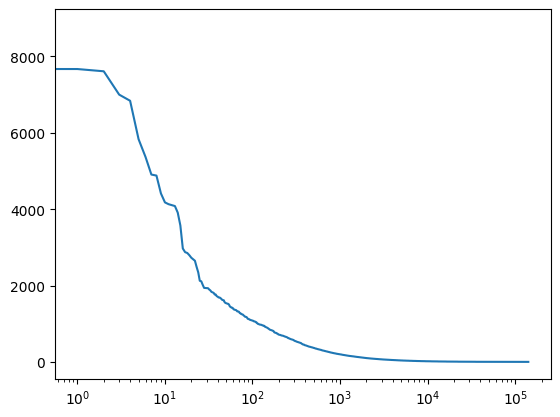

In [32]:
frc = [freq for word, freq in freq_dict_sorted]
plt.plot(frc)
plt.xscale('log')
plt.show()

In [33]:
print(len([(w, f) for w, f in freq_dict_sorted if f < 20]))

132326


In [34]:
high_freq_dict = [(w, f) for w, f in freq_dict_sorted if f > 100]

In [35]:
med_freq_dict = [(w, f) for w, f in freq_dict_sorted if (f >= 20 and f <= 100)]

In [36]:
low_freq_dict = [(w, f) for w, f in freq_dict_sorted if f < 20]

In [37]:
for i in [high_freq_dict, med_freq_dict, low_freq_dict]:
  print(f'Длина словаря: {len(i)}')

Длина словаря: 2004
Длина словаря: 7011
Длина словаря: 132326


### Задание 1.
Задание: обучите три классификатора:

1) на токенах с высокой частотой

2) на токенах со средней частотой

3) на токенах с низкой частотой

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df.tweet_token, df.label,
                                                    test_size=0.25)

In [39]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [40]:
def train_LR(vocab):
  vec = TfidfVectorizer(ngram_range=(1, 1), vocabulary=list(dict(vocab).keys()))
  bow = vec.fit_transform(x_train)
  clf = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)
  clf.fit(bow, y_train)
  pred = clf.predict(vec.transform(x_test))
  return classification_report(pred, y_test)

In [41]:
print(train_LR(high_freq_dict))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70     32269
           1       0.61      0.70      0.66     24440

    accuracy                           0.68     56709
   macro avg       0.68      0.68      0.68     56709
weighted avg       0.69      0.68      0.68     56709



In [42]:
print(train_LR(med_freq_dict))

              precision    recall  f1-score   support

           0       0.48      0.65      0.55     21318
           1       0.73      0.58      0.64     35391

    accuracy                           0.60     56709
   macro avg       0.61      0.61      0.60     56709
weighted avg       0.64      0.60      0.61     56709



In [43]:
print(train_LR(low_freq_dict))

              precision    recall  f1-score   support

           0       0.43      0.65      0.52     19070
           1       0.76      0.57      0.65     37639

    accuracy                           0.59     56709
   macro avg       0.60      0.61      0.58     56709
weighted avg       0.65      0.59      0.61     56709



Можно сделать вывод, что популярные слова важнее чем те, что редко встречаются



### Задание 2.
найти фичи с наибольшей значимостью, и вывести их


In [44]:
vec = TfidfVectorizer(ngram_range=(1, 1), vocabulary=list(dict(high_freq_dict).keys()))
bow = vec.fit_transform(x_train.values)
feature_names_high_freq = vec.get_feature_names_out()
df_high_freq_train = pd.DataFrame(bow.toarray(), columns = feature_names_high_freq)
bow_test = vec.transform(x_test.values)
df_high_freq_test = pd.DataFrame(bow_test.toarray(), columns = feature_names_high_freq)
clf = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)
clf.fit(bow, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [45]:
df_high_freq_train.head(5)

,сегодня,очень,хочу,день,просто,тебе,завтра,вс,вообще,спасибо,...,русские,звук,дээ,обещала,лучшего,хрена,право,однажды,этими,уезжать
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.281447,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.245415,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df_high_freq_test.head(5)

,сегодня,очень,хочу,день,просто,тебе,завтра,вс,вообще,спасибо,...,русские,звук,дээ,обещала,лучшего,хрена,право,однажды,этими,уезжать
0,0.0,0.449605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_feature_importance = pd.DataFrame({'feature': list(vec.get_feature_names_out()),
                                      'abs_weight': [abs(elem) for elem in list(clf.coef_[0])]}).sort_values(by='abs_weight', ascending=False)

In [48]:
df_feature_importance.head(10)

,feature,abs_weight
146,обидно,5.239569
402,печально,4.566034
220,грустно,4.234632
485,сожалению,3.837440
388,печаль,3.818885
849,жизньболь,3.794199
44,жаль,3.642220
118,жалко,3.634208
273,боль,3.614784
409,заболела,3.569894


Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [49]:
cool_token = 'обидно'
pred = [1 if cool_token in tweet else 0 for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67     56489
           1       0.01      0.91      0.01       220

    accuracy                           0.51     56709
   macro avg       0.50      0.71      0.34     56709
weighted avg       1.00      0.51      0.67     56709




### Задание 3.
1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера

3) убедиться что для сетки нет переобучения

In [50]:
def train_LR(vec):
  bow = vec.fit_transform(x_train)
  clf = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)
  clf.fit(bow, y_train)
  pred = clf.predict(vec.transform(x_test))
  return classification_report(pred, y_test)

In [51]:
vec = CountVectorizer(ngram_range=(1, 1), vocabulary=list(dict(high_freq_dict).keys()))

In [52]:
print(train_LR(vec))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71     32736
           1       0.61      0.71      0.65     23973

    accuracy                           0.68     56709
   macro avg       0.68      0.69      0.68     56709
weighted avg       0.69      0.68      0.68     56709



In [53]:
vec = TfidfVectorizer(ngram_range=(1, 1), vocabulary=list(dict(high_freq_dict).keys()))
print(train_LR(vec))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70     32269
           1       0.61      0.70      0.66     24440

    accuracy                           0.68     56709
   macro avg       0.68      0.68      0.68     56709
weighted avg       0.69      0.68      0.68     56709



In [54]:
vec = HashingVectorizer(ngram_range=(1, 1))
print(train_LR(vec))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74     30750
           1       0.68      0.74      0.71     25959

    accuracy                           0.72     56709
   macro avg       0.72      0.72      0.72     56709
weighted avg       0.73      0.72      0.72     56709



In [55]:
n_features_for_hash = [10 ** i for i in range(2, 7)]

In [56]:
for i in n_features_for_hash:
  vec = HashingVectorizer(ngram_range=(1, 1), n_features=i)
  print(f'Результаты при {i} параметрах')
  print(train_LR(vec))

Результаты при 100 параметрах
              precision    recall  f1-score   support

           0       0.60      0.56      0.58     30745
           1       0.52      0.55      0.53     25964

    accuracy                           0.56     56709
   macro avg       0.56      0.56      0.56     56709
weighted avg       0.56      0.56      0.56     56709

Результаты при 1000 параметрах
              precision    recall  f1-score   support

           0       0.65      0.62      0.64     30342
           1       0.59      0.62      0.60     26367

    accuracy                           0.62     56709
   macro avg       0.62      0.62      0.62     56709
weighted avg       0.62      0.62      0.62     56709

Результаты при 10000 параметрах
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     30094
           1       0.66      0.69      0.68     26615

    accuracy                           0.69     56709
   macro avg       0.69      0.69  

In [57]:
import torch
import torch.nn as nn

In [58]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [59]:
df.head(3)

,text,label,tweet_token
0,хоть школота но поверь нас то же самое обществ...,0,школота поверь самое общество предмет типа
1,да все таки он немного похож на него но мой ма...,0,таки немного похож мальчик равно
2,ну ты идиотка испугалась за тебя,0,идиотка испугалась


In [90]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [60]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

In [73]:
from torch.utils.data import DataLoader, Dataset

In [61]:
from nltk.probability import FreqDist

In [62]:
max_words = 500
max_len = 10

In [80]:
df_train, df_val = train_test_split(df, test_size=0.3,   shuffle=True, random_state=42)

In [84]:
df_train.reset_index(inplace=True, drop=True)
df_val.reset_index(inplace=True, drop=True)

In [68]:
df_train.value_counts('label')

label
0    80612
1    78171
dtype: int64

In [69]:
train_corpus = " ".join(df_train["tweet_token"])
train_corpus = train_corpus.lower()

In [70]:
def text_to_sequence(text, maxlen, vocabulary):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])
    padding = [0] * (maxlen-len(result))
    return result[-maxlen:] + padding

In [71]:
tokens = word_tokenize(train_corpus)
tokens_filtered = [word for word in tokens if word.isalnum()]
dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}

In [74]:
class DataWrapper(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).long()
        self.target = torch.from_numpy(target).long()
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)

In [87]:
x_train = np.asarray([text_to_sequence(text, max_len, vocabulary) for text in df_train["tweet_token"]], dtype=np.int32)
x_val = np.asarray([text_to_sequence(text, max_len, vocabulary) for text in df_val["tweet_token"]], dtype=np.int32)

In [88]:
x_val[0]

array([260,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [89]:
train_dataset = DataWrapper(x_train, df_train['label'].values)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

val_dataset = DataWrapper(x_val, df_val['label'].values)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [99]:
def train_net(model, epochs=20, th=0.5):
  model = model.to(device)
  model.train()

  train_loss_history = []
  test_loss_history = []
  train_f1_history = []
  test_f1_history = []

  for epoch in range(epochs):
      running_loss, test_loss = 0.0, 0.0
      tp_train, tn_train, fp_train, fn_train = 0.0, 0.0, 0.0, 0.0
      tp_test, tn_test, fp_test, fn_test = 0.0, 0.0, 0.0, 0.0
      pr_train, rec_train = 0.0, 0.0
      pr_test, rec_test = 0.0, 0.0
      f1_score_train, f1_score_test = 0.0, 0.0
      for i, data in enumerate(train_loader, 0):
          inputs, labels = data[0].to(device), data[1].to(device)

          # обнуляем градиент
          optimizer.zero_grad()
          outputs = model(inputs)

          loss = criterion(outputs, labels.float().view(-1, 1))
          loss.backward()
          optimizer.step()

          # подсчет ошибки на обучении
          running_loss += loss.item()
          # подсчет метрики на обучении
          pred_labels = torch.squeeze((outputs > th).int())
          tp_train += ((labels == pred_labels) & (labels == 1)).sum().item()
          tn_train += ((labels == pred_labels) & (labels == 0)).sum().item()
          fp_train += ((labels != pred_labels) & (labels == 0)).sum().item()
          fn_train += ((labels != pred_labels) & (labels == 1)).sum().item()

      # выводим статистику о процессе обучения
      model.eval()
      pr_train = tp_train / (tp_train + fp_train + .001)
      rec_train = tp_train / (tp_train + fn_train + .001)
      f1_score_train = 2 * pr_train * rec_train / (pr_train + rec_train + .001)
      print(f'Epoch [{epoch + 1}/{epochs}]. ' \
              f'Step [{i + 1}/{len(train_loader)}]. ' \
              f'Loss: {running_loss/(i+1):.3f}. ' \
              f'F1: {f1_score_train:.3f}', end='. ')

      train_loss_history.append(running_loss/(i+1))
      train_f1_history.append(f1_score_train)
      running_loss = 0.0
      tp_train, tn_train, fp_train, fn_train = 0.0, 0.0, 0.0, 0.0
      pr_train, rec_train = 0.0, 0.0
      f1_score_train = 0.0

          # выводим статистику на тестовых данных
      for j, data in enumerate(val_loader):
          test_labels = data[1].to(device)
          test_outputs = model(data[0].to(device))

          # подсчет ошибки на тесте
          test_loss += criterion(test_outputs, test_labels.float().view(-1, 1))
          # подсчет метрики на тесте
          pred_test_labels = torch.squeeze((test_outputs > th).int())
          tp_test += ((test_labels == pred_test_labels) & (test_labels == 1)).sum().item()
          tn_test += ((test_labels == pred_test_labels) & (test_labels == 0)).sum().item()
          fp_test += ((test_labels != pred_test_labels) & (test_labels == 0)).sum().item()
          fn_test += ((test_labels != pred_test_labels) & (test_labels == 1)).sum().item()

      pr_test = tp_test / (tp_test + fp_test + .001)
      rec_test = tp_test / (tp_test + fn_test + .001)
      f1_score_test = 2 * pr_test * rec_test / (pr_test + rec_test + .001)
      test_loss_history.append(test_loss.item()/(j+1))
      test_f1_history.append(f1_score_test)
      print(f'Test loss: {test_loss/(j+1):.3f}. Test F1: {f1_score_test:.3f}')
      test_loss = 0.0
      tp_test, tn_test, fp_test, fn_test = 0.0, 0.0, 0.0, 0.0
      pr_test, rec_test = 0.0, 0.0
      f1_score_test = 0.0

      model.train()

  print('Training is finished!')
  return train_loss_history, test_loss_history, train_f1_history, test_f1_history

In [93]:
class LSTMFixedLen2(nn.Module) :
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, use_last=True):
        super().__init__()
        self.use_last = use_last
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, ht = self.lstm(x)

        if self.use_last:
            last_tensor = lstm_out[:,-1,:]
        else:
            # use mean
            last_tensor = torch.mean(lstm_out[:,:], dim=1)

        out = self.linear(last_tensor)
        out = self.dropout(out)
        # print(out.shape)
        return torch.sigmoid(out)

In [94]:
def plot_history():
  plt.figure(figsize=(11,5))
  plt.plot(train_loss_history, 'b--', label='train_loss')
  plt.plot(test_loss_history, 'g--', label='test_loss')
  plt.plot(train_f1_history, 'b', label='train_f1')
  plt.plot(test_f1_history, 'g', label='test_f1')
  plt.grid()
  plt.legend()
  plt.show()

In [100]:
model = LSTMFixedLen2(vocab_size=500)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()
train_loss_history, test_loss_history, train_f1_history, test_f1_history = train_net(model)

Epoch [1/20]. Step [311/311]. Loss: 0.663. F1: 0.392. Test loss: 0.635. Test F1: 0.619
Epoch [2/20]. Step [311/311]. Loss: 0.649. F1: 0.412. Test loss: 0.623. Test F1: 0.568
Epoch [3/20]. Step [311/311]. Loss: 0.647. F1: 0.421. Test loss: 0.625. Test F1: 0.556
Epoch [4/20]. Step [311/311]. Loss: 0.646. F1: 0.416. Test loss: 0.623. Test F1: 0.586
Epoch [5/20]. Step [311/311]. Loss: 0.644. F1: 0.420. Test loss: 0.622. Test F1: 0.571
Epoch [6/20]. Step [311/311]. Loss: 0.644. F1: 0.423. Test loss: 0.620. Test F1: 0.601
Epoch [7/20]. Step [311/311]. Loss: 0.644. F1: 0.426. Test loss: 0.623. Test F1: 0.588
Epoch [8/20]. Step [311/311]. Loss: 0.643. F1: 0.424. Test loss: 0.622. Test F1: 0.588
Epoch [9/20]. Step [311/311]. Loss: 0.642. F1: 0.429. Test loss: 0.620. Test F1: 0.584
Epoch [10/20]. Step [311/311]. Loss: 0.643. F1: 0.432. Test loss: 0.626. Test F1: 0.595
Epoch [11/20]. Step [311/311]. Loss: 0.642. F1: 0.428. Test loss: 0.621. Test F1: 0.590
Epoch [12/20]. Step [311/311]. Loss: 0.64

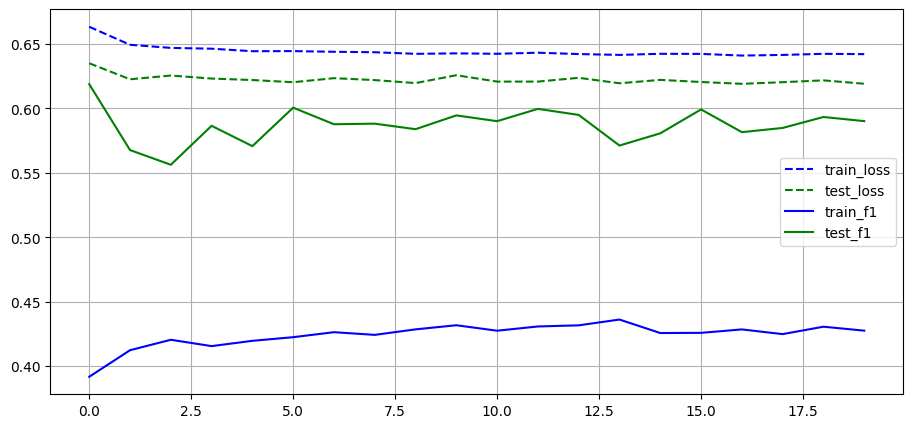

In [101]:
plot_history()

In [102]:
model.eval()
list_accuracy = []
for data in val_loader:
  test_outputs = model(data[0].to(device))
  label = data[1].to(device)
  predict = torch.squeeze((test_outputs > 0.5).int())
  break
print(classification_report(predict.cpu(), label.cpu()))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.57      0.67      0.62        12

    accuracy                           0.69        32
   macro avg       0.67      0.68      0.68        32
weighted avg       0.70      0.69      0.69        32

